In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [5]:
df=pd.read_csv("C:\\Users\\farhanfarooq\\Desktop\\work files\\ExcelR\\Assignments\\wine PCA.csv")
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [6]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [7]:
df_data=df.iloc[:,1:13]

In [10]:
df_data.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93


In [11]:
wine=df.values

In [12]:
wine

array([[1.000e+00, 1.423e+01, 1.710e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.000e+00, 1.320e+01, 1.780e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.000e+00, 1.316e+01, 2.360e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [3.000e+00, 1.327e+01, 4.280e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [3.000e+00, 1.317e+01, 2.590e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [3.000e+00, 1.413e+01, 4.100e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [13]:
df_normal=scale(wine)
df_normal

array([[-1.21394365,  1.51861254, -0.5622498 , ...,  0.36217728,
         1.84791957,  1.01300893],
       [-1.21394365,  0.24628963, -0.49941338, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [-1.21394365,  0.19687903,  0.02123125, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 1.37386437,  0.33275817,  1.74474449, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 1.37386437,  0.20923168,  0.22769377, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.37386437,  1.39508604,  1.58316512, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [14]:
pca=PCA()
pca_values=pca.fit_transform(df_normal)

In [15]:
pca_values

array([[-3.52293390e+00, -1.45309844e+00, -1.64795488e-01, ...,
         5.52927766e-01, -3.02978176e-01,  2.00857450e-01],
       [-2.52885806e+00,  3.30019252e-01, -2.02670665e+00, ...,
         3.94971160e-01, -1.46645308e-01,  1.26402355e-01],
       [-2.78502898e+00, -1.03693595e+00,  9.83237703e-01, ...,
         1.89799314e-03,  2.12780166e-02, -5.57515155e-02],
       ...,
       [ 3.02727243e+00, -2.75604024e+00, -9.40803036e-01, ...,
         6.93336340e-01,  1.67035660e-01, -3.16957430e-02],
       [ 2.75522166e+00, -2.29378408e+00, -5.50473677e-01, ...,
         3.44119826e-01, -1.09514873e-01,  1.02823104e-01],
       [ 3.49633565e+00, -2.76060799e+00,  1.01315115e+00, ...,
        -1.89866131e-01, -1.64090011e-01, -2.64916504e-01]])

In [16]:
pca = PCA(n_components = 12)
pca_values = pca.fit_transform(df_normal)

In [17]:
pca_values

array([[-3.52293390e+00, -1.45309844e+00, -1.64795488e-01, ...,
         1.06556955e+00, -4.20493905e-01,  5.52927766e-01],
       [-2.52885806e+00,  3.30019252e-01, -2.02670665e+00, ...,
        -2.01820313e-02, -1.30019629e-01,  3.94971160e-01],
       [-2.78502898e+00, -1.03693595e+00,  9.83237703e-01, ...,
        -1.06249125e-01, -2.79074108e-01,  1.89799314e-03],
       ...,
       [ 3.02727243e+00, -2.75604024e+00, -9.40803036e-01, ...,
        -2.12749351e-01,  5.02640272e-01,  6.93336340e-01],
       [ 2.75522166e+00, -2.29378408e+00, -5.50473677e-01, ...,
         4.79793171e-01,  3.13785741e-01,  3.44119826e-01],
       [ 3.49633565e+00, -2.76060799e+00,  1.01315115e+00, ...,
         7.99077497e-02, -2.38282390e-01, -1.89866131e-01]])

In [18]:
var = pca.explained_variance_ratio_
var

array([0.39542486, 0.17836259, 0.10329102, 0.06627984, 0.06267875,
       0.0480556 , 0.03955707, 0.02500244, 0.02103871, 0.01873615,
       0.01613203, 0.01205691])

In [19]:
pca.components_

array([[ 0.39366953, -0.13632501,  0.22267638, -0.00225793,  0.22429849,
        -0.12463016, -0.35926404, -0.39071171,  0.2670012 , -0.2790625 ,
         0.08931829, -0.27682265, -0.35052618, -0.26951525],
       [-0.00569041, -0.48416087, -0.22359095, -0.31585588,  0.01161574,
        -0.30055143, -0.06711983,  0.00131345, -0.0269887 , -0.04122256,
        -0.52978274,  0.27790735,  0.16277625, -0.36605886],
       [ 0.00121795, -0.20740081,  0.08879606,  0.62610236,  0.6119896 ,
         0.13098458,  0.14650775,  0.15096275,  0.16997551,  0.14987959,
        -0.1372663 ,  0.08532854,  0.16620436, -0.12668685],
       [ 0.12246373, -0.08191848,  0.46988824, -0.24984122,  0.07199322,
        -0.16321412,  0.19098521,  0.14461667, -0.32801272,  0.46275771,
         0.07211248, -0.43466618,  0.15672341, -0.2557949 ],
       [ 0.15758395, -0.25089415, -0.18860015, -0.0935236 ,  0.0465675 ,
         0.77833048, -0.14466563, -0.11200553, -0.43257916,  0.0915882 ,
        -0.0462696 , -0.02

In [20]:
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([39.54, 57.38, 67.71, 74.34, 80.61, 85.42, 89.38, 91.88, 93.98,
       95.85, 97.46, 98.67])

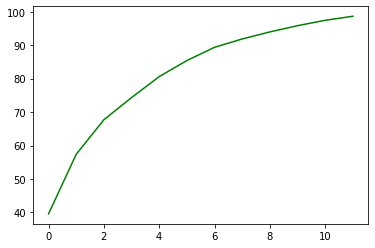

In [21]:
plt.plot(var1,color="green")

In [36]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [37]:
def minmax_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)

In [38]:
df_norm=minmax_func(df.iloc[:,1:])

In [39]:
df_norm.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963


In [41]:
hc=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='complete')

In [42]:
hc

AgglomerativeClustering(linkage='complete', n_clusters=3)

In [43]:
y_hc = hc.fit_predict(df_norm)
clusters=pd.DataFrame(y_hc,columns=['clusters'])

In [45]:
clusters

,clusters
0,1
1,1
2,1
3,1
4,1
...,...
173,2
174,2
175,2
176,2


In [47]:
clusters.value_counts()

clusters
0           73
1           62
2           43
dtype: int64

In [48]:
df_norm['h_clusterid']=y_hc

In [49]:
df_norm

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,h_clusterid
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341,1
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642,1
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933,1
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347,1
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.705263,0.970356,0.582888,0.510309,0.271739,0.241379,0.056962,0.735849,0.205047,0.547782,0.130081,0.172161,0.329529,2
174,0.623684,0.626482,0.598930,0.639175,0.347826,0.282759,0.086498,0.566038,0.315457,0.513652,0.178862,0.106227,0.336662,2
175,0.589474,0.699605,0.481283,0.484536,0.543478,0.210345,0.073840,0.566038,0.296530,0.761092,0.089431,0.106227,0.397290,2
176,0.563158,0.365613,0.540107,0.484536,0.543478,0.231034,0.071730,0.754717,0.331230,0.684300,0.097561,0.128205,0.400856,2


In [54]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [55]:
scaler=StandardScaler()
scaled_df=scaler.fit_transform(df.iloc[:,1:])

In [56]:
scaled_df

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

C:\Users\farhanfarooq\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


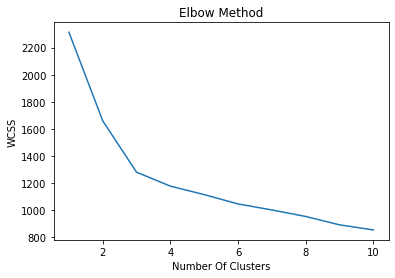

In [57]:
wcss = []#within cluster sum of square
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number Of Clusters')
plt.ylabel('WCSS')
plt.show()

In [58]:
clusters_new=KMeans(3,random_state=1300)
clusters_new.fit(scaled_df)

KMeans(n_clusters=3, random_state=1300)

In [62]:
clusters_new.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [63]:
df['ClusterId_new']=clusters_new.labels_

In [64]:
df.groupby('ClusterId_new').agg(['mean']).reset_index()
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,ClusterId_new
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,1
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,1
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,1
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,1


In [65]:
clusters_new.cluster_centers_

array([[-0.92607185, -0.39404154, -0.49451676,  0.17060184, -0.49171185,
        -0.07598265,  0.02081257, -0.03353357,  0.0582655 , -0.90191402,
         0.46180361,  0.27076419, -0.75384618],
       [ 0.16490746,  0.87154706,  0.18689833,  0.52436746, -0.07547277,
        -0.97933029, -1.21524764,  0.72606354, -0.77970639,  0.94153874,
        -1.16478865, -1.29241163, -0.40708796],
       [ 0.83523208, -0.30380968,  0.36470604, -0.61019129,  0.5775868 ,
         0.88523736,  0.97781956, -0.56208965,  0.58028658,  0.17106348,
         0.47398365,  0.77924711,  1.12518529]])

In [66]:
df.groupby('ClusterId_new').agg(['mean']).reset_index()

,ClusterId_new,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,2.000000,12.250923,1.897385,2.231231,20.063077,92.738462,2.247692,2.050000,0.357692,1.624154,2.973077,1.062708,2.803385,510.169231
1,1,2.941176,13.134118,3.307255,2.417647,21.241176,98.666667,1.683922,0.818824,0.451961,1.145882,7.234706,0.691961,1.696667,619.058824
2,2,1.048387,13.676774,1.997903,2.466290,17.462903,107.967742,2.847581,3.003226,0.292097,1.922097,5.453548,1.065484,3.163387,1100.225806


In [67]:
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,ClusterId_new
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,1
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,1
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,1
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,1


In [68]:
df['ClusterId_new']=df['ClusterId_new'].replace(0,'Cluster 1')
df['ClusterId_new']=df['ClusterId_new'].replace(1,'Cluster 2')
df['ClusterId_new']=df['ClusterId_new'].replace(2,'Cluster 3')
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,ClusterId_new
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,Cluster 3
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,Cluster 3
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,Cluster 3
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,Cluster 3
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,Cluster 3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,Cluster 2
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,Cluster 2
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,Cluster 2
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,Cluster 2
